In [1]:
import sklearn as sk
import pandas as pd
import numpy as np
import seaborn as sns
from src.models.RandomForestClassifier import RFClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


in this notebook we will train and save a random forest model then plot and show different metrics for the model

In [8]:
RandomForest = RFClassifier()
#load train and test split
X_train = pd.read_csv('../data/processed/train_with_outlier_undersampled.csv')
y_train = X_train['class']
X_train = X_train.drop(['class'], axis=1)
X_test = pd.read_csv('../data/processed/test_with_outlier.csv')
y_test = X_test['class']
X_test = X_test.drop(['class'], axis=1)
#encode labels
label_encoder = LabelEncoder().fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)


We do a grid search to find the best parameters for the model

We run this code in google colab and save the data of the grid searh in a csv file

 [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1TqehMW7PY5Uu6mqdNrI-QY-2_uj9qFE5?authuser=2#scrollTo=yZtNVPu0hrp-)

In [9]:
#random search for random forest
from scipy.stats import randint as sp_randint
param_dist = {
    'bootstrap': [True],
    'random_state': [0],
    'max_depth': sp_randint(10, 100),
    'max_features': sp_randint(1, 8),
    'min_samples_leaf': sp_randint(1, 10),
    'min_samples_split': sp_randint(5, 20),
    'n_estimators': sp_randint(100, 700),
    'class_weight': [None,'balanced', 'balanced_subsample'],
    'criterion': ['gini'],
    'warm_start': [False],
    'ccp_alpha': [0],
}

RandomForest.hyperparameter_tuning(X_train, y_train, param_dist,'halving-random',3,'f1_macro')
print(RandomForest.best_params)

{'model__bootstrap': True, 'model__ccp_alpha': 0, 'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 35, 'model__max_features': 4, 'model__min_samples_leaf': 2, 'model__min_samples_split': 8, 'model__n_estimators': 370, 'model__random_state': 0, 'model__warm_start': False}


Show results of the model, plot the confusion matrix and show the classification report

Inference time : 2.7975678443908692e-06 seconds
              precision    recall  f1-score   support

           0       0.94      0.90      0.92     11889
           1       0.76      0.85      0.80      3792
           2       0.79      0.82      0.81      4319

    accuracy                           0.87     20000
   macro avg       0.83      0.86      0.84     20000
weighted avg       0.88      0.87      0.87     20000

auc score for class 0:  0.96623488221127
auc score for class 1:  0.9644160785838946
auc score for class 2:  0.9575820310943296


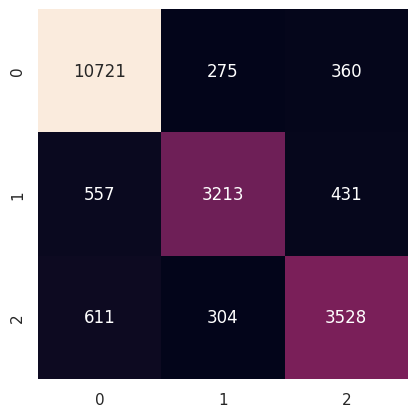

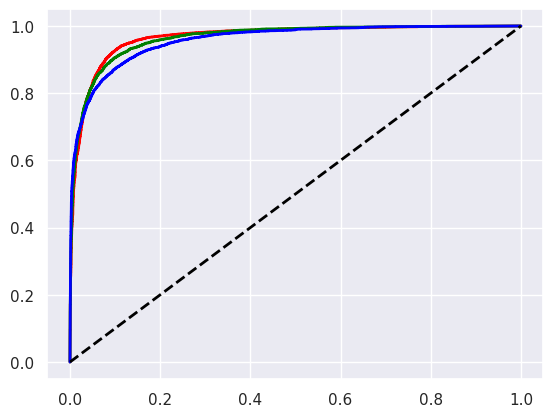

In [10]:
#change X_test columns names to u,g,r,i,z,redshift
X_test.columns = ['u', 'g', 'r', 'i', 'z','redshift']
RandomForest.evaluate(X_test, y_test)

Save the model to be used for comparison

In [7]:
RandomForest.save('RandomForest_with_unbalanced')